<a href="https://colab.research.google.com/github/yvrjsharma/HugginFace_Gradio/blob/main/YouTube_SearchInAVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

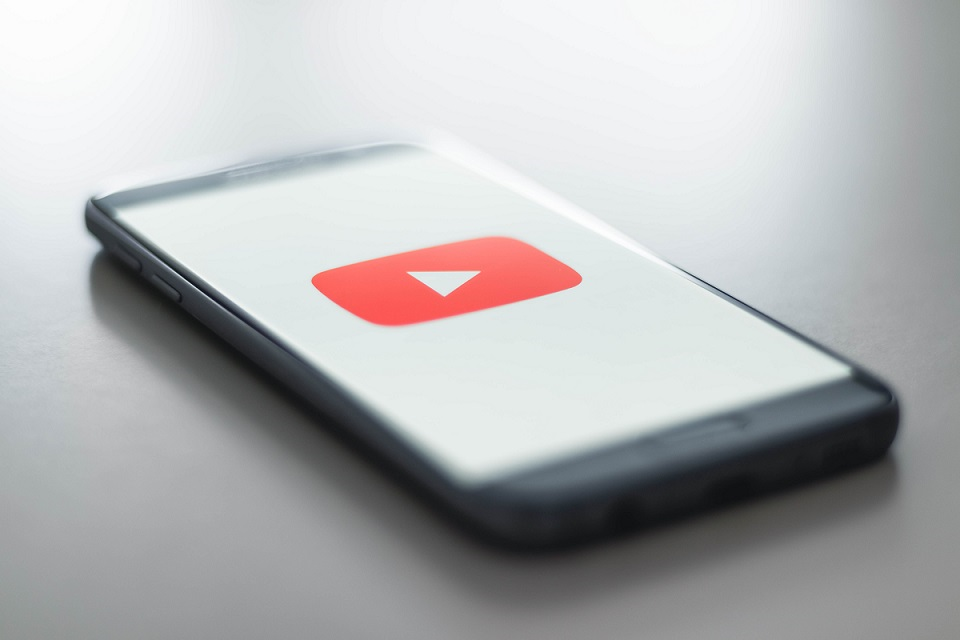

In [1]:
!pip install youtube-transcript-api 

In [2]:
!pip install -q transformers datasets

     |████████████████████████████████| 4.2 MB 8.2 MB/s 
     |████████████████████████████████| 346 kB 68.2 MB/s 
     |████████████████████████████████| 6.6 MB 52.8 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 596 kB 63.2 MB/s 
     |████████████████████████████████| 140 kB 52.1 MB/s 
     |████████████████████████████████| 1.1 MB 53.1 MB/s 
     |████████████████████████████████| 212 kB 58.5 MB/s 
     |████████████████████████████████| 127 kB 10.2 MB/s 
     |████████████████████████████████| 271 kB 50.7 MB/s 
     |████████████████████████████████| 144 kB 31.1 MB/s 
     |████████████████████████████████| 94 kB 4.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
def get_transcript(link):
  video_id = link.split("=")[1]
  transcript = YouTubeTranscriptApi.get_transcript(video_id)
  FinalTranscript = ' '.join([i['text'] for i in transcript])
  return transcript

In [3]:

from youtube_transcript_api import YouTubeTranscriptApi

#link = "https://www.youtube.com/watch?v=OP2bNlY1bnk"
link = "https://www.youtube.com/watch?v=smUHQndcmOY&t=425s" #yannic
link = "https://www.youtube.com/watch?v=smUHQndcmOY&t=399s"
video_id = link.split("=")[1]
print(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

smUHQndcmOY&t


In [4]:
FinalTranscript = ' '.join([i['text'] for i in transcript])
print(FinalTranscript)

deepmind releases a system called flamingo google releases a system called lit and ai 21 labs releases a system that's called miracle it's a fun week welcome to ml news have fun all right hey there my name is yannick welcome to the channel this is already part two of this week's news i've done part one released it a few days ago so if you haven't checked that out a lot has happened in this week let's dive into more of it deepmind releases a blog post called tackling multiple tasks with a single visual language model which details a model that's called flamingo so this model is essentially what gpt 3 was for language but for images and language this means that it can take in both images and language and multiple images and multiple pieces of text and then output a piece of text in response to it it can also handle all of this in a sort of conversational mode and it's pretty powerful now one interesting thing is that it builds upon pre-trained and frozen models so as you can see right he

In [5]:
transcript

[{'duration': 4.48, 'start': 0.0, 'text': 'deepmind releases a system called'},
 {'duration': 6.159,
  'start': 1.76,
  'text': 'flamingo google releases a system called'},
 {'duration': 5.92,
  'start': 4.48,
  'text': 'lit and ai 21 labs releases a system'},
 {'duration': 7.001,
  'start': 7.919,
  'text': "that's called miracle it's a fun week"},
 {'duration': 4.52, 'start': 10.4, 'text': 'welcome to ml news have fun'},
 {'duration': 3.6,
  'start': 16.32,
  'text': 'all right hey there my name is yannick'},
 {'duration': 4.08,
  'start': 17.84,
  'text': 'welcome to the channel this is already'},
 {'duration': 4.16,
  'start': 19.92,
  'text': "part two of this week's news i've done"},
 {'duration': 3.84,
  'start': 21.92,
  'text': 'part one released it a few days ago so'},
 {'duration': 4.08,
  'start': 24.08,
  'text': "if you haven't checked that out a lot"},
 {'duration': 4.72,
  'start': 25.76,
  'text': "has happened in this week let's dive"},
 {'duration': 4.64,
  'start': 

- Framing the problem as span clasification task
- Using MiniLM model fine-tuned on Squad 2.0 for Extractive QA

In [ ]:
def get_answers_timestamp(question, transcript):
  model_ckpt = "deepset/minilm-uncased-squad2"
  tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
  #question = "any funny examples in video??"
  context = transcript
  inputs = tokenizer(question, context, return_overflowing_tokens=True, max_length=512, stride = 25)

  #overlaps
  #getting a list of contexts available after striding
  contx=[]
  for window in inputs["input_ids"]:
      #print(f"{tokenizer.decode(window)} \n")
      contx.append(tokenizer.decode(window).split('[SEP]')[1].strip())
  #print(ques)
  #print(contx)

  model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)
  lst=[]
  pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
  for contexts in contx:
    #print(pipe(question=question, context=contexts))
    lst.append(pipe(question=question, context=contexts))

  lst_scores = [dicts['score'] for dicts in lst] 
  #print(lst_scores)
  #getting highest and second highest scores
  idxmax = lst_scores.index(max(lst_scores))
  lst_scores.remove(max(lst_scores))
  idxmax2 = lst_scores.index(max(lst_scores))
  #idxmax, idxmax2

  idxcont = lst[idxmax2]['start']
  answer = FinalTranscript[len(contx[0])-135 + idxcont:]
  sentence_keyword = answer[:50]

  dftranscript = pd.DataFrame(transcript)
  #dftranscript.head()

  modelST = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
  embedding_1= modelST.encode(dftranscript.text, convert_to_tensor=True)
  embedding_2 = modelST.encode(sentence_keyword, convert_to_tensor=True)

  similarity_tensor = util.pytorch_cos_sim(embedding_1, embedding_2)
  idx = torch.argmax(similarity_tensor)
  start_timestamp = dftranscript.iloc[[int(idx)+1]].start.values[0]
  start_timestamp = round(start_timestamp)

  return start_timestamp

In [6]:
from transformers import AutoTokenizer

model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/107 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/477 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [14]:
#question = "any funny examples in video??"
question = "is it possible to download the stylegan model?"
context = FinalTranscript
inputs = tokenizer(question, context, return_overflowing_tokens=True, max_length=512, stride = 25)

In [15]:
for idx, window in enumerate(inputs["input_ids"]):
    print(f"Window #{idx} has {len(window)} tokens")

Window #0 has 512 tokens
Window #1 has 512 tokens
Window #2 has 512 tokens
Window #3 has 512 tokens
Window #4 has 512 tokens
Window #5 has 512 tokens
Window #6 has 512 tokens
Window #7 has 512 tokens
Window #8 has 512 tokens
Window #9 has 512 tokens
Window #10 has 144 tokens


In [16]:
#overlaps
contx=[]
for window in inputs["input_ids"]:
    print(f"{tokenizer.decode(window)} \n")
    #ques.append(tokenizer.decode(window).split('[SEP]')[0].replace('[CLS]','').strip())
    contx.append(tokenizer.decode(window).split('[SEP]')[1].strip())
#print(ques)
print(contx)






[CLS] is it possible to download the stylegan model? [SEP] deepmind releases a system called flamingo google releases a system called lit and ai 21 labs releases a system that's called miracle it's a fun week welcome to ml news have fun all right hey there my name is yannick welcome to the channel this is already part two of this week's news i've done part one released it a few days ago so if you haven't checked that out a lot has happened in this week let's dive into more of it deepmind releases a blog post called tackling multiple tasks with a single visual language model which details a model that's called flamingo so this model is essentially what gpt 3 was for language but for images and language this means that it can take in both images and language and multiple images and multiple pieces of text and then output a piece of text in response to it it can also handle all of this in a sort of conversational mode and it's pretty powerful now one interesting thing is that it builds up

In [17]:
contx

["deepmind releases a system called flamingo google releases a system called lit and ai 21 labs releases a system that's called miracle it's a fun week welcome to ml news have fun all right hey there my name is yannick welcome to the channel this is already part two of this week's news i've done part one released it a few days ago so if you haven't checked that out a lot has happened in this week let's dive into more of it deepmind releases a blog post called tackling multiple tasks with a single visual language model which details a model that's called flamingo so this model is essentially what gpt 3 was for language but for images and language this means that it can take in both images and language and multiple images and multiple pieces of text and then output a piece of text in response to it it can also handle all of this in a sort of conversational mode and it's pretty powerful now one interesting thing is that it builds upon pre - trained and frozen models so as you can see righ

In [21]:
contx[7][1751:]

"er to take a baseline even if you want to invent something new start from a baseline good implementation and then work your way up from there this blog post details 37 implementation details for ppo so if you want to figure out what kind of work goes into something like stable baselines three maybe give this blog post a read deepmind tweets about the release of four new libraries for the jax ecosystem i have to say jax is looking better and better by the day so there's mctx which does monte carlo tree search in jacks there's kfac jax which is a second order optimization library there's dm aux which is a sound and audio signal"

In [18]:
from transformers import pipeline
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)
lst=[]
pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
for contexts in contx:
  print(pipe(question=question, context=contexts))
  lst.append(pipe(question=question, context=contexts))


/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:707: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor = as_tensor(value)
/usr/local/lib/python3.7/dist-packages/transformers/pipelines/question_answering.py:300: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  for span_id in range(num_spans)


{'score': 0.0009459594148211181, 'start': 1153, 'end': 1173, 'answer': 'is completely frozen'}
{'score': 0.11552927643060684, 'start': 207, 'end': 280, 'answer': 'you give your employees and a bunch of like very trusted first beta users'}
{'score': 0.00044294478720985353, 'start': 1610, 'end': 1660, 'answer': 'two possibilities right here one is that the model'}
{'score': 4.2718256736407056e-05, 'start': 1564, 'end': 1596, 'answer': 'both vision text models together'}
{'score': 0.07940279692411423, 'start': 1174, 'end': 1218, 'answer': 'only have access to the tiny and small model'}
{'score': 0.00022264586004894227, 'start': 2071, 'end': 2149, 'answer': 'you can actually enter your own queries here they have three experts available'}
{'score': 0.24178655445575714, 'start': 1751, 'end': 1787, 'answer': 'the models are available to download'}
{'score': 0.0008614138932898641, 'start': 1135, 'end': 1168, 'answer': "case it's not a very standard one"}
{'score': 8.685699140187353e-05, 'start

In [22]:
lst

[{'answer': 'is completely frozen',
  'end': 1173,
  'score': 0.0009459594148211181,
  'start': 1153},
 {'answer': 'you give your employees and a bunch of like very trusted first beta users',
  'end': 280,
  'score': 0.11552927643060684,
  'start': 207},
 {'answer': 'two possibilities right here one is that the model',
  'end': 1660,
  'score': 0.00044294478720985353,
  'start': 1610},
 {'answer': 'both vision text models together',
  'end': 1596,
  'score': 4.2718256736407056e-05,
  'start': 1564},
 {'answer': 'only have access to the tiny and small model',
  'end': 1218,
  'score': 0.07940279692411423,
  'start': 1174},
 {'answer': 'you can actually enter your own queries here they have three experts available',
  'end': 2149,
  'score': 0.00022264586004894227,
  'start': 2071},
 {'answer': 'the models are available to download',
  'end': 1787,
  'score': 0.24178655445575714,
  'start': 1751},
 {'answer': "case it's not a very standard one",
  'end': 1168,
  'score': 0.00086141389328

In [23]:
lst_scores = [dicts['score'] for dicts in lst] 
print(lst_scores)
idxmax = lst_scores.index(max(lst_scores))
lst_scores.remove(max(lst_scores))
idxmax2 = lst_scores.index(max(lst_scores))
idxmax, idxmax2

[0.0009459594148211181, 0.11552927643060684, 0.00044294478720985353, 4.2718256736407056e-05, 0.07940279692411423, 0.00022264586004894227, 0.24178655445575714, 0.0008614138932898641, 8.685699140187353e-05, 0.00031170976581051946, 0.0875520408153534]


(6, 1)

In [31]:
#new 
sentence_for_timestamp = lst[idxmax]['answer']
print(lst[idxmax]['answer'])

import pandas as pd
dftranscript = pd.DataFrame(transcript)
dftranscript.head()

#!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer, util
modelST = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

embedding_1= modelST.encode(dftranscript.text, convert_to_tensor=True)
embedding_2 = modelST.encode(sentence_for_timestamp, convert_to_tensor=True)

import torch
similarity_tensor = util.pytorch_cos_sim(embedding_1, embedding_2)
idx = torch.argmax(similarity_tensor)
print(int(idx))
dftranscript.iloc[[int(idx)]], dftranscript.iloc[[int(idx)-1]], dftranscript.iloc[[int(idx)+1]] #, answer[:50]  #+1 it is then!
#dftranscript.iloc[[int(idx)+1]].text.values[0]  #to get just the text

start_timestamp = dftranscript.iloc[[int(idx)-1]].start.values[0]
print(start_timestamp)
#start_timestamp_mins = start_timestamp
print(f"mins : {start_timestamp //60}, seconds: {(start_timestamp - (start_timestamp //60)*60)}")

the models are available to download
418
956.079
mins : 15.0, seconds: 56.07899999999995


In [20]:
#contx
#idxmax2

idxcont = lst[idxmax2]['start']
answer = FinalTranscript[len(contx[0])-135 + idxcont:]
answer

"this funny and it says well there's a guy trying to read his weight but then obama's foot on it so it's heavier than the guy thinks and so on but the guy doesn't know so you have to sort of lead i mean you can go find this picture for yourself not going to read the whole thing but you have to lead it to like what is he doing he's looking at the scale where is obama's foot position it's positioned on the right side of the scale what happens as a result the scale shows higher so you you have to like carry the questions along so i don't think that challenge has been passed quite yet by flamingo another cool thing that i've seen this by alexa gordage the model is very non-susceptible to some of the let's say properties of visual models especially visual models if you train them on the classification task they will often interpret this top picture here as elephant because they focus on textures where as i'm going to guess if you train with more of a image language focus that tends to focus

In [21]:
answer[:50]

"this funny and it says well there's a guy trying t"

In [24]:
import pandas as pd
dftranscript = pd.DataFrame(transcript)
dftranscript.head()

,text,start,duration
0,deepmind releases a system called,0.000,4.480
1,flamingo google releases a system called,1.760,6.159
2,lit and ai 21 labs releases a system,4.480,5.920
3,that's called miracle it's a fun week,7.919,7.001
4,welcome to ml news have fun,10.400,4.520


In [34]:
len(dftranscript)

635

In [25]:
transcript[0:2]

[{'duration': 4.48, 'start': 0.0, 'text': 'deepmind releases a system called'},
 {'duration': 6.159,
  'start': 1.76,
  'text': 'flamingo google releases a system called'}]

In [28]:
#!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer, util
sentences = ["I'm happy", "I'm full of happiness"]

modelST = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

#Compute embedding for both lists
embedding_1= modelST.encode(sentences[0], convert_to_tensor=True)
embedding_2 = modelST.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.6003]], device='cuda:0')

In [30]:
embedding_1= modelST.encode(dftranscript.text, convert_to_tensor=True)
embedding_1

tensor([[-0.0658, -0.1106, -0.0190,  ...,  0.0397,  0.0096,  0.0456],
        [-0.0873, -0.0479, -0.0465,  ...,  0.0198,  0.0416,  0.0537],
        [-0.0296, -0.0549,  0.0011,  ..., -0.0065,  0.0503, -0.0238],
        ...,
        [-0.0665, -0.0346,  0.0820,  ..., -0.0562, -0.0163, -0.0248],
        [-0.0381,  0.0559,  0.0770,  ..., -0.0259,  0.0945, -0.0425],
        [ 0.0490,  0.0125, -0.0157,  ...,  0.0070,  0.1057,  0.0375]],
       device='cuda:0')

In [32]:
embedding_2 = modelST.encode(answer[:50], convert_to_tensor=True)
embedding_2.shape

torch.Size([384])

In [74]:
import torch
similarity_tensor = util.pytorch_cos_sim(embedding_1, embedding_2)
idx = torch.argmax(sim_tensor)
#print(int(idx))
#dftranscript.iloc[[int(idx)]], dftranscript.iloc[[int(idx)-1]], dftranscript.iloc[[int(idx)+1]], answer[:50]  #+1 it is then!
#dftranscript.iloc[[int(idx)+1]].text.values[0]  #to get just the text
start_timestamp = dftranscript.iloc[[int(idx)+1]].start.values[0]
#start_timestamp_mins = start_timestamp
start_timestamp //60 + (start_timestamp - (start_timestamp //60)*60)   #ok, got it

32.79900000000001

In [36]:
print(embedding_1.shape)
embedding_1[0].shape

torch.Size([635, 384])


torch.Size([384])

In [28]:
l1 = [{'score': 0.0023309949319809675, 'start': 1358, 'end': 1389, 'answer': 'the first image is a chinchilla'}
,{'score': 0.06368252635002136, 'start': 1296, 'end': 1348, 'answer': "it says well there's a guy trying to read his weight"}
,{'score': 0.02664562501013279, 'start': 1453, 'end': 1515, 'answer': 'uploading a picture of i guess himself with the drawn on beard'}
,{'score': 0.0002691063564270735, 'start': 2271, 'end': 2317, 'answer': 'the clip model can do zero shot classification'}
,{'score': 0.00012585840886458755, 'start': 1953, 'end': 2016, 'answer': 'a weather api a currency converter wikipedia api a calendar app'}
,{'score': 0.0006746666040271521, 'start': 1713, 'end': 1770, 'answer': 'calculating some functions or looking up some data online'}
,{'score': 0.002610242459923029, 'start': 1527, 'end': 1599, 'answer': 'sleeves are shortened and elongated skirts and pants and tops are edited'}
,{'score': 0.00035410249256528914, 'start': 169, 'end': 180, 'answer': 'fake tensor'}
,{'score': 0.00013901654165238142, 'start': 1511, 'end': 1571, 'answer': 'you can select width and height then you can place the walls'}
,{'score': 0.0006524120690301061, 'start': 1418, 'end': 1423, 'answer': 'music'}
,{'score': 0.11319012194871902, 'start': 0, 'end': 14, 'answer': 'world changing'}]

idxcont = l1[idxmax2]['start']

con = "deepmind releases a system called flamingo google releases a system called lit and ai 21 labs releases a system that's called miracle it's a fun week welcome to ml news have fun all right hey there my name is yannick welcome to the channel this is already part two of this week's news i've done part one released it a few days ago so if you haven't checked that out a lot has happened in this week let's dive into more of it deepmind releases a blog post called tackling multiple tasks with a single visual language model which details a model that's called flamingo so this model is essentially what gpt 3 was for language but for images and language this means that it can take in both images and language and multiple images and multiple pieces of text and then output a piece of text in response to it it can also handle all of this in a sort of conversational mode and it's pretty powerful now one interesting thing is that it builds upon pre-trained and frozen models so as you can see right here on the left the vision encoder is completely frozen which is indicated by the little snowflakey thing the language model that everything feeds into is completely frozen and the entire training of the model is simply adapting these in-between parts these adapters that connect the two modalities together that's pretty cool here you can see an example the first image is a chinchilla along with a description the second image is a shiva along with a description the third image is a flamingo and then the model is supposed to complete what this is and it bases this upon the entire prompt which is images and text this model can be used in a multitude of ways it can do classification by simply scoring answers it can do image captioning it can do question answering about images even about video since you can take in multiple images and those frames of a video and it pushes the state of the art in various image language tasks here you can see another bunch of interactions so what is in the picture it's a bowl of soup with a monster face on it what's the monster made of and it says it's made of vegetables the operator says nah probably not it's a fabric and the model says it's wool which you know it's quite a special image all right this is yannick from the future we have some new results out of flamingo now deepmind seems to follow this similar strategy as openai's which i'm going to guess they observed and they learned that it works namely that you give your employees and a bunch of like very trusted first beta users access to the model and then you instruct all of them or you let them tweet about it so it on social media it looks like it's coming from many people and not just from like one corporate account makes it seem much more organic but you know as long as this group is very tightly controlled take all the outputs with a grain of salt nevertheless we do have some outputs right here so i've seen this picture going around and variations of it i don't know if this is the only one but they are all very similar in their result andre carpati originally i believe posted this photograph and and essentially said this should be one of or this could be one of the benchmark tasks for visual models if a visual model could explain why this picture is funny that would be i guess i don't know impressive and people have been trying as i said to post these conversations with flamingo which is certainly impressive but you have to lead flamingo to the point where it kind of tells you why it's funny you can't just ask why is this funny and it says well there's a guy trying to read his weight but then obama's foot on it so it's heavier than the guy thinks and so on but the guy doesn't know so you have to sort of lead i mean you can go find this picture for yourself not going to read the whole thing but you have to lead it to like what is he doing he's looking at the scale where is obama's foot position it's positioned on the right side of the scale what happens as a result the scale shows higher so you you have to like carry the questions along so i don't think that challenge has been passed quite yet by flamingo another cool thing that i've seen this by alexa gordage the model is very non-susceptible to some of the let's say properties of visual models especially visual models if you train them on the classification task they will often interpret this top picture here as elephant because they focus on textures where as i'm going to guess if you train with more of a image language focus that tends to focus more on object dns inside of images so flamingo correctly recognized what correctly it recognizes this is a picture of a cat which i'm going to guess most humans would also see like this even though the picture is clearly i guess nonsensical if you want and then if it doesn't if there's no shape in it it says this is a picture of elephant's skin another cool one is this one right here there's this picture with the this giant cat in it and flamingo says this is a model of a city it looks like a tiny city with a lot of people and cars which is correct i don't know a human would maybe say well it's a tiny city and there's normal-sized cat in it but again if you kind of lead the model to what you sort of want to get out of it it gets it ultimately so it says is there anything unusual it says i see a cat in the photo is there anything unusual about the cat the cat is very big so ultimately you get the answer you want again you have to sort of get stuff out of the model yeah it's not really touring test passing yet i would say in this tasks at least but it's getting there like there's not too much missing i feel until this is really at the level of humans explaining these types of pictures not agi just at this task it's very impressive not quite there yet as you often have to lead it but you know getting there another thing also about lewis which i found quite funny is this one uploading a picture of i guess himself with the drawn on beard the model says this is a selfie of a man with a beard now there's two possibilities right here one is that the model was actually fooled by the beard and two is that the model realized that lewis had put a lot of effort into that beard but he just isn't very skilled at drawing it doesn't want to hurt his feelings so it's complementing his drawing skills in this way we don't know it could be much smarter than you initially think so you know who knows now back to yannick in the past now there is a paper to go along with it it's 66 pages long and very detailed and very cool and probably deserves its own video another highlight is that the model builds upon the perceiver architecture which means that as you can see here for example the image part on the left here goes into a perceiver resampler model which is one of these adapter model that they train during training and then that is routed into the main part via these learned latent queries of the perceiver so a perceiver in this way works a bit different than something like gpt3 which just always attends to the entire past the perceiver has a latent stream of information that it carries through and then tries to add to that using attention into the things that come in so into the pictures from here on out and then it merges that into the entire language model transformer so here you can see one block of that language model transformer it is essentially as you know a language model but it every now and then gets these cross inputs from this gated cross attention dense layer which is exactly where that visual information comes in from the perceiver resampler another interesting thing here is the collection of data they sampled 43 million web pages for images and text and used as far as i can tell visual analysis in order to see which text goes with which image which text comes before which text comes after and so on and all of this is essentially processed to one stream of information that consists of images text and pointers to how they connect safe to say this paper is packed with information and packed with cool ideas and i think the possibilities of both vision text models together but also the combination of learned parts and then frozen parts and how that all works how we can reuse knowledge that we take from single task models and then fuse them together is very promising direction which brings us into the next story google research releases a paper on locked image tuning abbreviated lit so this is a model that combines the advantages of fine tuning but also the advantages of contrastive pre-training now if you do contrastive training usually you take two pieces of information in these cases again an image and a text and you try to align their embeddings as much as possible this results in representations in which you can do similarity search and all kinds of things over these inputs for example the clip model can do zero shot classification by simply taking an image listing all the classes and then evaluating the similarity of the representations to each of the classes on the other hand there is the method of fine-tuning in which you take some sort of model like a pre-trained imagenet model and then transfer or fine-tune it to your task locked image tuning combines both of them so what it does is it has a pre-trained image encoder and then it only fine-tunes the text encoder such that the pieces of text the representations match with the representations that the image encoder gives now you might think that is a step back namely something like clip tunes both the image encoder and the text encoder however what this paper finds is that if you freeze the vision model then you do get much better performance there is something about the contrastive training that almost loses a bit of information that the pre-trained vision encoder would contain otherwise therefore simply fine-tuning the text model helps a lot in retaining a lot of that information there's also a little bit of an online demo where you can try out the tool so you can select one of these images and then you can give it a bunch of classes a bunch of labels and then evaluate that model what's also cool is that this demo runs fully in the browser you only have access to the tiny and small model because otherwise your browser would catch fire i guess however it's pretty cool that you can do this at all [Music] ai21 labs releases jurassic x in a blog post called crossing the neural symbolic chasm with the mrkl system this is the modular reasoning knowledge and language system and is abbreviated miracle now this here is both about a concept for a new system these miracle systems as well as a first implementation of it in the form of jurassic x now previously ar21 has built a language model called jurassic 1 which was similar to gpt3 and now they're using that language model to interact with non-neural systems so the idea in miracle systems is that you combine the language model together with a bunch of what they call experts so experts here are in form of for example a weather api a currency converter wikipedia api a calendar app some sort of calculator stock databases anything that you can query get inputs from or send inputs to and get some sort of results out of those notably these are black boxes and for sure they're not backpropable they're not differentiable so the challenge is how do you make these language models interact with these experts the way jurassic x does it is in form of these input adapters which will analyze the input query which is in natural language in this case which green companies had the largest increased share price in the last month they will then go out and query all of the available experts with the input that they parse out of the language merge all of this in a very discreet and symbolic fashion into a calculator experts that they also have access to and at the end this goes back into a language model which then gives you a language answer this obviously is a more tedious more manual more engineering intensive effort than something like gpt3 that simply gives you an answer out of the box however when it comes to more complicated stuff i believe that this approach here might be promising so so far if we want something like gpt3 to do multi-step reasoning or anything like this we can do it sort of by prompting it very intelligently however it currently has its limits you can clearly see how this architecture would help a lot with that however on the other hand the challenge with this architecture is how do you connect these black box discrete parts with the neural parts and probably promising approaches might lie somewhere in the middle either by making these black boxes more accessible to the neural things like somehow combining them with back backprop or maybe combining something like the reasoning prompt engineering from gpt3 with traces of how people use these experts i don't know how it's ultimately going to look but it's pretty cool additionally having these experts decouples what the language model needs to do namely language and parsing things out of language with the abilities of the experts for example calculating some functions or looking up some data online which is something that frozen language models can't even do no matter how big they are hey this is yannick from the future i don't think i've made this really clear in the original post that i made about this but you can actually enter your own queries here they have three experts available one is the calculator one is jurassic one the language model and one is the titanic db so a database of passengers of the titanic so you can enter any question in here how much is the fish and the fish costs 1.99 this is answered directly by the jurassic one model now let's let's try to make use of some of these experts how many passengers over 30 years old survived on the titanic let's see if he gets it okay select count survived from titan i like i came up i did not test this before this video this this is quite impressive how many meters is the capital of tibet higher than the capital of india by how many meters okay well still the jurassic language model answered this one i was trying to get it to route to the calculator but what i want to stress is that you can input your own queries right here and directly try the model this is very cool and very different from other models that you don't have access to at all like dali or flamingo and where the website you can only select predefined queries so i wanted to highlight that here yes they do have predefined queries to give you an idea however you can also definitely go and just enter your own so try it out [Music] all right and now we're going into a long list of helpful things and cool things that i've just seen around stalgan human is a ganner even multiple gans that are trained on humans humans and different clothing in different positions and is pretty good i have to say they have a nice website and a video to go along with it if you want to know how it works you can do things like interpolation and every time i see something like this i'm just amazed at you know how far gans have come this has nice applications for things like fashion design or if you want to shop something in an online store to see how it would look on you or just kind of editing your style and clothes and look as you can see right here sleeves are shortened and elongated skirts and pants and tops are edited all kinds of fun stuff there's a paper and a github repo and the models are available to download graphic is a data augmentation library for pytorch geometric so this brings data augmentation to graph neural networks usually data augmentation obviously very widely used in things like vision however graph neural networks are kind of a new thing and this library provides some useful augmentation tools for that especially if you work with pytorch geometric give this a try burton gptj6b is a spanish fine-tuned version of gptj6b if you want to generate text in espanol check it out torchdistx is the repository for experimental stuff in torch distributed so this is where all the stuff goes that is not yet quite ready for pytorch distributed one cool thing is the fake tensor now they already have meta tensors and fake tensors are quite similar but i didn't know either so i thought it was cool this is a tensor that looks like it's allocated somewhere on a device and you can work with it however it isn't so when you want to access the data or do anything with it it either fails or it then needs to load the data at that time this is especially useful in order to do any sort of delayed execution of stuff but you already want to build the computation graph or in order to inspect models that are just too large for you to load them all at once so you kind of load the graph in but not the way it's not any of the data and you just look at individual parts and you just load them as needed very cool vector flow by netflix is another neural network library however this one is optimized for sparse data and single machine environments which is a good use case it's not a very standard one so this might actually be interesting for you to do some new things on it i saw this blog post from the iclear blog track the 37 implementation details of proximal policy optimization and this is obviously something that is well known in the domain of reinforcement learning namely that these algorithms are not stable they require a lot and a lot and a lot of tricks to get working and that's why people usually regress to taking standard implementations rather than implementing it themselves don't try to implement rl algorithms yourself it is a pain and it is almost always better to take a baseline even if you want to invent something new start from a baseline good implementation and then work your way up from there this blog post details 37 implementation details for ppo so if you want to figure out what kind of work goes into something like stable baselines three maybe give this blog post a read deepmind tweets about the release of four new libraries for the jax ecosystem i have to say jax is looking better and better by the day so there's mctx which does monte carlo tree search in jacks there's kfac jax which is a second order optimization library there's dm aux which is a sound and audio signal processing library and there is tf2 jax which converts tensorflow functions and graphs into jacks mgpt is a 1.3 billion parameter language model that has been trained on over 60 languages and is available on hogging face if you do anything in terms of multilingual natural language generation this might be a good starting point clean lab is an open source library that helps you find and correct labeling mistakes in data if you work in the real world and you have messy data and you suspect labeling errors are a big problem which they probably are maybe give clean lab a shot they assist you in fixing mistakes and sometimes they even do it automatically shout out to the efficient deep learning book this book is in a draft stage and you can already look at the first four chapters of it from the table of contents you can see that it deals with stuff like compression techniques more efficient learning techniques and in the later stages it takes some deep dives into specific platforms for example tensorflow or into specific models here for example bert or mobilenet or efficientnet so if you want to be not just a user but a knower maybe this book is for you the mini hack level editor is a level editor for mini hack if you use mini hack in any sort of experimentation which i could be fun it looks like fun certainly this level editor will help you make some nice test cases for your agent at inference time i mean you could do it for training time but how many are you gonna make in any case you can select width and height then you can place the walls and you can place the lava how about some lava here oh yeah mujen is a playground for video audio text multimodal understanding and generation so this is a data set of gameplay of an open source game so here's how that looks so what you saw is a piece of gameplay and then they also always showed you the pixel segmentation map so this is video segments from a bot playing this game and the idea is that there are multiple modalities combined so there's always the sound there is the picture that you get and there is this pixel-wise segmentation map so this is intended for you to build models that understand what's happening by considering multiple input streams at once it's very cool they have 375 000 of these video clips and along the clips they also have textual descriptions of what's happening in them amazon releases the massive data set this is a big data set as the name says and it is a 51 language data set containing utterances in the respective languages along with code to get started so if you're doing very multilingual natural language understanding this might be a good data set openfx is an open source 3d face animation system so the goal here is to have a system that simulates realistic facial expression this is probably one of the hardest tasks you can do because we humans are excellent at recognizing when a facial expression is not realistic but the simulator makes a very good impression and could be the basis of many ml inputs or output pipelines [Applause] ah see it doesn't like smile with your eyes that's what they always say you're not you're not smart you're not smiling with your eyes ah wait this could be the thumbnail avalanche is an end-to-end library for continual learning based on pytorch so this is a library that seeks to just make continual learning a whole lot easier for you i can imagine i've never done anything in continued learning but i can imagine that it's quite hard because many components need to come together this stuff goes on for a long time even infinite time right you have to keep track of stuff keep track of checkpoints be able to roll back have replay buffers evaluate at regular intervals yada yada so if there is a library that handles a lot of that in one very cool [Music] and the last thing this ai does not exist.com will generate you descriptions and small usage code snippets of ai projects that do not exist so what you can do is you can click next here for example this is the hacker news reply guy ai which is a bot for the hacker news comment section here you get a little bit of a code snippet on how that works if you press next then you'll get the next ai but you can also enter your own name so let's try that how about yeah you only poop once this is a little bit of play on yolo let's see what comes out pun intended yopo is a neural network that learns to predict if an image of a dog will result in a poop or not it was developed by a team at the university of bonn and the university of amsterdam great work university of pond university of amsterdam this is world changing you can even see here the snippet says i should load the image dog jpeg excellent excellent it's apparently convnet so i'm quite relieved all right that was already it for ml news this week thank you so much for being here if you have news tips don't hesitate to come by our discord or if you just want to hang out i mean that's cool too in any case i'll see you next week and stay hydrated bye [Music]"

con0 = "deepmind releases a system called flamingo google releases a system called lit and ai 21 labs releases a system that's called miracle it's a fun week welcome to ml news have fun all right hey there my name is yannick welcome to the channel this is already part two of this week's news i've done part one released it a few days ago so if you haven't checked that out a lot has happened in this week let's dive into more of it deepmind releases a blog post called tackling multiple tasks with a single visual language model which details a model that's called flamingo so this model is essentially what gpt 3 was for language but for images and language this means that it can take in both images and language and multiple images and multiple pieces of text and then output a piece of text in response to it it can also handle all of this in a sort of conversational mode and it's pretty powerful now one interesting thing is that it builds upon pre - trained and frozen models so as you can see right here on the left the vision encoder is completely frozen which is indicated by the little snowflakey thing the language model that everything feeds into is completely frozen and the entire training of the model is simply adapting these in - between parts these adapters that connect the two modalities together that's pretty cool here you can see an example the first image is a chinchilla along with a description the second image is a shiva along with a description the third image is a flamingo and then the model is supposed to complete what this is and it bases this upon the entire prompt which is images and text this model can be used in a multitude of ways it can do classification by simply scoring answers it can do image captioning it can do question answering about images even about video since you can take in multiple images and those frames of a video and it pushes the state of the art in various image language tasks here you can see another bunch of interactions so what is in the picture it's a bowl of soup with a monster face on it what's the monster made of and it says it's made of vegetables the operator says nah probably not it's a fabric and the model says it's wool which you know it's quite a special image all right this is yannick from the future we have some new results out of flamingo now deepmind seems to follow this similar strategy as openai's which [SEP] "

con1 = "future we have some new results out of flamingo now deepmind seems to follow this similar strategy as openai's which i'm going to guess they observed and they learned that it works namely that you give your employees and a bunch of like very trusted first beta users access to the model and then you instruct all of them or you let them tweet about it so it on social media it looks like it's coming from many people and not just from like one corporate account makes it seem much more organic but you know as long as this group is very tightly controlled take all the outputs with a grain of salt nevertheless we do have some outputs right here so i've seen this picture going around and variations of it i don't know if this is the only one but they are all very similar in their result andre carpati originally i believe posted this photograph and and essentially said this should be one of or this could be one of the benchmark tasks for visual models if a visual model could explain why this picture is funny that would be i guess i don't know impressive and people have been trying as i said to post these conversations with flamingo which is certainly impressive but you have to lead flamingo to the point where it kind of tells you why it's funny you can't just ask why is this funny and it says well there's a guy trying to read his weight but then obama's foot on it so it's heavier than the guy thinks and so on but the guy doesn't know so you have to sort of lead i mean you can go find this picture for yourself not going to read the whole thing but you have to lead it to like what is he doing he's looking at the scale where is obama's foot position it's positioned on the right side of the scale what happens as a result the scale shows higher so you you have to like carry the questions along so i don't think that challenge has been passed quite yet by flamingo another cool thing that i've seen this by alexa gordage the model is very non - susceptible to some of the let's say properties of visual models especially visual models if you train them on the classification task they will often interpret this top picture here as elephant because they focus on textures where as i'm going to guess if you train with more of a image language focus that tends to focus more on object dns inside of images so flamingo correctly recognized what [SEP] "

con[len(con0)-135 + idxcont:]


"nny and it says well there's a guy trying to read his weight but then obama's foot on it so it's heavier than the guy thinks and so on but the guy doesn't know so you have to sort of lead i mean you can go find this picture for yourself not going to read the whole thing but you have to lead it to like what is he doing he's looking at the scale where is obama's foot position it's positioned on the right side of the scale what happens as a result the scale shows higher so you you have to like carry the questions along so i don't think that challenge has been passed quite yet by flamingo another cool thing that i've seen this by alexa gordage the model is very non-susceptible to some of the let's say properties of visual models especially visual models if you train them on the classification task they will often interpret this top picture here as elephant because they focus on textures where as i'm going to guess if you train with more of a image language focus that tends to focus more o

In [ ]:
FinalTranscript